In [1]:
# Imports
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Load the data
df = pd.read_csv("../data/creditcard.csv")

# Separate features and label
X = df.drop("Class", axis=1)
y = df["Class"]

In [3]:
# Scale 'Amount' and 'Time'
scaler = StandardScaler()
X[["Time", "Amount"]] = scaler.fit_transform(X[["Time", "Amount"]])

# Cresult
print(X.shape)
X.head()

(284807, 30)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.996583,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964
1,-1.996583,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475
2,-1.996562,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686
3,-1.996562,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534
4,-1.996541,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403


In [4]:
from sklearn.decomposition import PCA

# Initialize PCA with 2 components
pca = PCA(n_components=2)

# Fit and transform the scaled data
X_pca = pca.fit_transform(X)

# Converted to DataFrame for easier plotting
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
pca_df['Class'] = y.values  # Added labels back for coloring


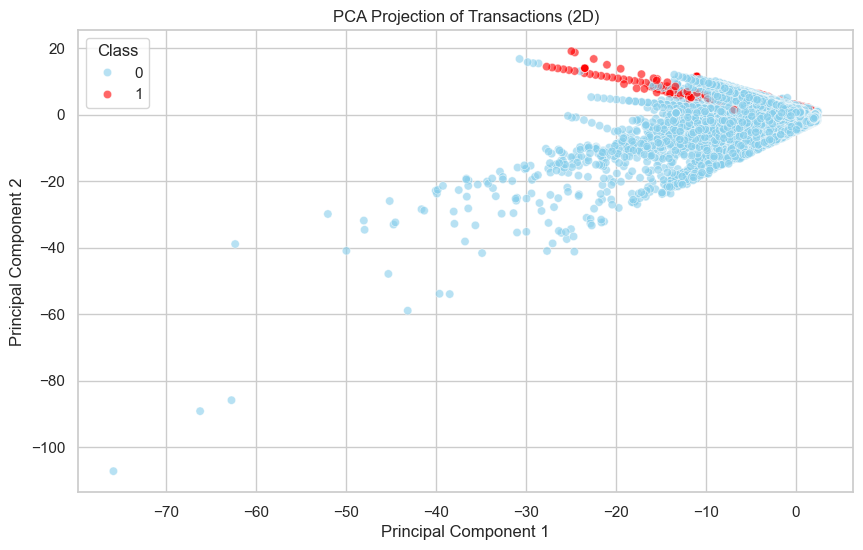

In [5]:
# Setting plot style
sns.set(style="whitegrid", rc={"figure.figsize": (10, 6)})

# 2D Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='PC1', y='PC2',
    hue='Class',
    data=pca_df,
    palette={np.int64(0): 'skyblue', np.int64(1): 'red'},
    alpha=0.6
)
plt.title("PCA Projection of Transactions (2D)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

In [8]:
from sklearn.cluster import KMeans

# Trying with 2 clusters (fraud vs. normal assumption)
kmeans = KMeans(n_clusters=2, random_state=42)
pca_df["kmeans_cluster"] = kmeans.fit_predict(pca_df[["PC1", "PC2"]])


In [13]:
pd.crosstab(pca_df["Class"], pca_df["kmeans_cluster"], rownames=["Actual"], colnames=["Cluster"])
# adding cluster label as new column
X["kmeans_cluster"] = pca_df["kmeans_cluster"]

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

# Train model
rf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight="balanced")
rf.fit(X_train, y_train)

# Predict
y_pred = rf.predict(X_test)

# Evaluate
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=["Normal", "Fraud"]))

Confusion Matrix:
 [[85292     3]
 [   44   104]]

Classification Report:
               precision    recall  f1-score   support

      Normal       1.00      1.00      1.00     85295
       Fraud       0.97      0.70      0.82       148

    accuracy                           1.00     85443
   macro avg       0.99      0.85      0.91     85443
weighted avg       1.00      1.00      1.00     85443

